<a href="https://colab.research.google.com/github/apirakqqqqq/GE337_Programming/blob/main/Lab2/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
!pip install geopandas rasterio folium shapely matplotlib -q

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**โหลด VECTOR**

In [68]:
import geopandas as gpd

# พื้นที่ศึกษา
aoi = gpd.read_file('/content/Phetburi.geojson')

# จุดสถานี
stations = gpd.read_file('/content/TMD_ALL_Phetburi.geojson')

print(aoi.head())
print(stations.head())
print("CRS AOI:", aoi.crs)
print("CRS Stations:", stations.crs)

   FID  OBJECTID AMPHOE_IDN AMP_CODE         AMPHOE_T  \
0    0       836       7601       01  อ.เมืองเพชรบุรี   
1    1       837       7602       02        อ.เขาย้อย   
2    2       838       7603       03  อ.หนองหญ้าปล้อง   
3    3       839       7604       04           อ.ชะอำ   
4    4       840       7605       05         อ.ท่ายาง   

                   AMPHOE_E PROV_CODE  PROV_NAM_T            PROV_NAM_E  \
0  Amphoe Muang Phetchaburi        76  จ.เพชรบุรี  Changwat Phetchaburi   
1           Amphoe Khao Yoi        76  จ.เพชรบุรี  Changwat Phetchaburi   
2      Amphoe Nong Ya Plong        76  จ.เพชรบุรี  Changwat Phetchaburi   
3             Amphoe Cha Am        76  จ.เพชรบุรี  Changwat Phetchaburi   
4           Amphoe Tha Yang        76  จ.เพชรบุรี  Changwat Phetchaburi   

  P_CODE  ORIG_FID     Shape_Leng    Shape_Area  \
0     PB       765  115387.625015  2.879390e+08   
1     PB       766   95235.221131  3.166559e+08   
2     PB       767  301466.868900  1.225485e+09   
3 

โหลด Raster GeoTiff

In [69]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

raster_path = '/content/phetchaburi_s2_RGB_NIR_SMALL.tif'

src = rasterio.open(raster_path)

print(src.profile)

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 5619, 'height': 4456, 'count': 4, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.0001796630568239043, 0.0, 99.09854888292914,
       0.0, -0.0001796630568239043, 13.340161632231718), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}


**Matplotlib เพรชบุรี**

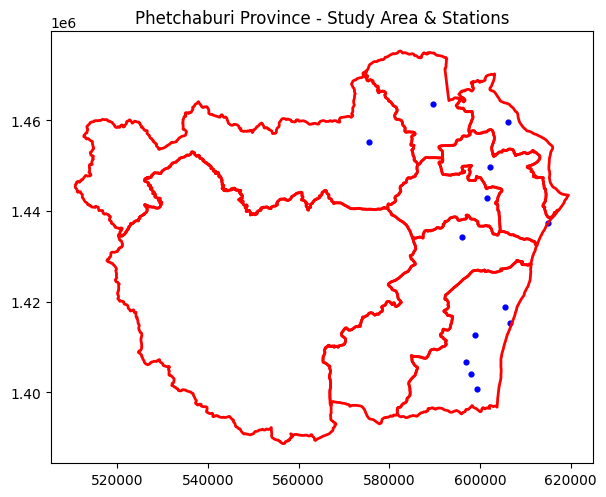

In [58]:
import geopandas as gpd
import matplotlib.pyplot as plt

# โหลดข้อมูล
aoi = gpd.read_file('/content/Phetburi.geojson')
stations = gpd.read_file('/content/TMD_ALL_Phetburi.geojson')

# แปลง CRS ให้ตรงกัน (WGS84)
stations = stations.to_crs(aoi.crs)

# plot
fig, ax = plt.subplots(figsize=(7,7))
aoi.boundary.plot(ax=ax, color='red', linewidth=2)
stations.plot(ax=ax, color='blue', markersize=12)

ax.set_title("Phetchaburi Province - Study Area & Stations")
plt.show()

**Folium เพรชบุรี**

In [59]:
import folium

# พิกัดศูนย์กลางจังหวัดเพชรบุรี (ค่าคงที่)
center_lat = 13.1116
center_lon = 99.9447

m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=9,
    tiles='OpenStreetMap'
)

# AOI
folium.GeoJson(aoi, name='AOI').add_to(m)

# Stations
for _, row in stations.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=4,
        color='blue',
        fill=True
    ).add_to(m)

m

**แสดง Band**

In [70]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

raster_path = "/content/phetchaburi_s2_RGB_NIR_SMALL.tif"

with rasterio.open(raster_path) as src:
    red = src.read(1).astype(float)
    nir = src.read(4).astype(float)  # Band 4 = NIR (ตามไฟล์นี้)
    profile = src.profile

print("CRS:", src.crs)

CRS: EPSG:4326


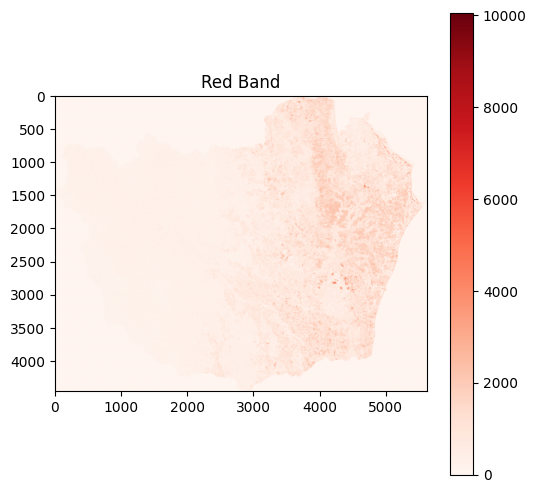

In [71]:
plt.figure(figsize=(6,6))
plt.imshow(red, cmap='Reds')
plt.title("Red Band")
plt.colorbar()
plt.show()

/tmp/ipython-input-1884952243.py:1: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red) / (nir + red)


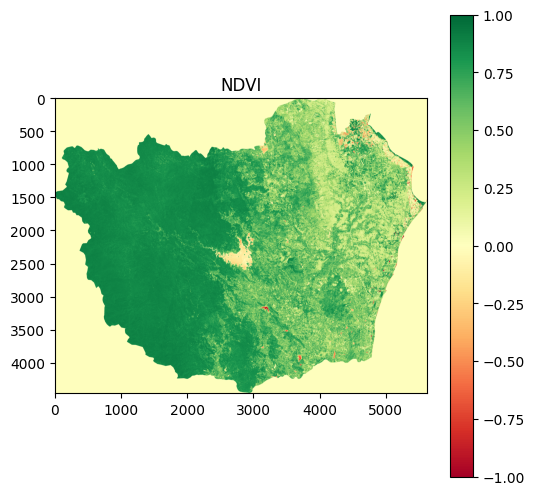

In [72]:
ndvi = (nir - red) / (nir + red)
ndvi = np.where((nir + red) == 0, 0, ndvi)

plt.figure(figsize=(6,6))
plt.imshow(ndvi, cmap='RdYlGn')
plt.title("NDVI")
plt.colorbar()
plt.show()

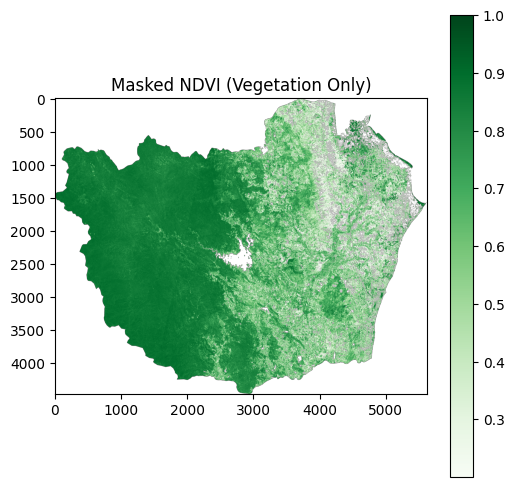

In [73]:
ndvi_masked = np.where(ndvi > 0.2, ndvi, np.nan)

plt.figure(figsize=(6,6))
plt.imshow(ndvi_masked, cmap='Greens')
plt.title("Masked NDVI (Vegetation Only)")
plt.colorbar()
plt.show()

**รวม Vertor + Rasater**

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


ValueError: aspect must be finite and positive 

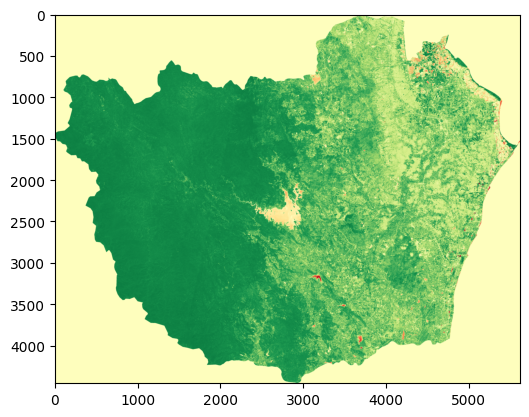

In [78]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))

# แสดง NDVI ก่อน
ax.imshow(ndvi, cmap='RdYlGn')
print(points.crs)
points.set_crs(src.crs, inplace=True)

# plot จุดทับลงไป
points.plot(ax=ax, color='blue', markersize=50)

plt.title("NDVI + Station")
plt.show()

**คำถามท้าย Lab 2**

**1. ข้อดีและข้อเสียของการใช้ Matplotlib และ Folium ในการแสดงผลข้อมูลเชิงพื้นที่คืออะไร?**

**Matplotlib**
ข้อดี : เหมาะกับการวิเคราะห์เชิงสถิติ ควบคุมรูปแบบกราฟได้ละเอียด แสดง raster/geopandas ได้ดี
ข้อเสีย : ไม่เป็น Interactive ซูม/เลื่อนแผนที่ไม่ได้

**Folium** ข้อดี : เป็น Interactive ซูมเข้า-ออกได้ เหมาะกับงานนำเสนอแผนที่

ข้อเสีย : วิเคราะห์เชิงลึกไม่ได้ และจัดการ raster ขนาดใหญ่ไม่สะดวก


**2. ทำไมเราต้องใช้ Masking และ Clipping ในการวิเคราะห์ข้อมูลภาพถ่ายดาวเทียม?**

เพื่อจำกัดข้อมูลให้อยู่เฉพาะพื้นที่ศึกษา ช่วยลดขนาดข้อมูล โฟกัสเฉพาะพื้นที่ที่ต้องการ และ ตัดพื้นนอกขอบเขตที่ต้องการ

**3. ค่า NDVI บ่งบอกถึงอะไร? และสามารถใช้ NDVI ในการวิเคราะห์อะไรได้บ้าง?**

NDVI ใช้วัดความหนาแน่นและสุขภาพของพืชพรรณ สามารถใช้วิเคราะห์สุขภาพพืช ปริมาณพื้นที่สีเขียว การเปลี่ยนแปลงป่าไม้ และภัยแล้ง

**4. การแปลงค่าพิกัด (CRS) มีความสำคัญอย่างไรในการทำงานกับข้อมูลเวกเตอร์และแรสเตอร์?**

CRS ต้องตรงกันเพื่อให้ข้อมูลเวกเตอร์และแรสเตอร์ซ้อนทับกันอย่างถูกต้อง หากไม่ตรงกันจะทำให้ตำแหน่งผิดตำแหน่งและวิเคราะห์คลาดเคลื่อน

**5. หากต้องการวิเคราะห์ข้อมูลภาพถ่ายดาวเทียมในช่วงเวลาต่าง ๆ (Time Series) ควรทำอย่างไร?**

คือการวิเคราะห์ “การเปลี่ยนแปลงตามเวลา” ของข้อมูลภาพถ่ายดาวเทียม เช่น การเปลี่ยนแปลงความเขียวของพืช พื้นที่ป่า หรือความแห้งแล้ง ในช่วงหลายเดือนหรือหลายปี